# Polaritones -- Modelo de Jaynes Cummings

I.C. Andrade, Universidad de Antioquia: isabel.andrade@udea.edu.co | github:isandrade-udea

En este Jupyter notebook, se usa QuTiP: The Quantum Toolbox in Python para estudiar los polaritanes del modelos de Jaynes -- Cummings. Se muestras los efectos del regimen de acople en el espectro de potencias.



La forma más simple de describir la interacción de la materia con el campo electromagnético cuantizado es mediante el modelo de Jaynes-Cummings (JC). En este modelo la materia se trata como un sistema de dos niveles en interacción cuasiresonante con un solo modo del campo de radiación dentro de una cavidad (0D). Los estados de la materia se pueden interpretar de acuerdo al sistema: en el caso del átomo, los autoestados representan un par de estados cercanos a la resonancia con el campo electromagnético, cuya transición es permitida por la regla de selección de dipolo eléctrico; cuando se trata de un punto cuántico, el estado excitado representa la situación en que hay excitón, i.e., hay un electrón en la banda de conducción y un hueco en la banda de valencia, mientras que el estado base significa que no hay excitón, i.e., el electrón está en la banda de valencia. El hamiltoniano de Jaynes-Cummings:


$$ H =\omega_\sigma \sigma^\dagger \sigma + \omega_a a^\dagger a + g \left(a^\dagger \sigma + a \sigma^\dagger \right) $$


Los dos primeros terminos en $H$ son los hamiltonianos libres del sistema de dos niveles y del modo de la cavidad, respectivamente, cuyas energías o autovalores se conocen como modos desnudos y sus autoestados como estados desnudos. El tercer termino es el hamiltoniano de interacción que describe el regimen de acople de los sistemas, este hamiltoniano se encarga de vestir los modos y los estados, i.e, cuando el regimen de acople es debil, el hamiltoniano de interaccion es despreciable y los modos son los modos desnudos que en este caso son indistigubles, y los estados son el producto directo de los estados desnudos de los hamiltonianos libres; cuando el acople es fuerte los modos de energía se desdoblan y dejan de ser indistinguibles y se crean  los modos vestidos o polaritónicos, la interacción crea una mezcla que es una rotación de los estados  desnudos conocida como estados vestidos o estados polaritónicos (Gerry & Knight, 2005):


(<Figure size 216x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f089aec7590>)

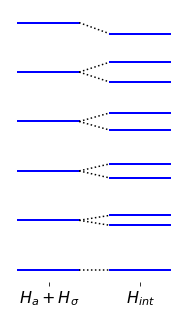

In [1]:
#librerias
%matplotlib inline
from IPython.display import Image
import math
import cmath
import scipy 
import pylab as p 
import matplotlib.artist as pltart
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import pickle
from IPython.display import Image
import scipy.interpolate
import matplotlib.ticker as ticker 
from matplotlib import cm
from matplotlib.colors import from_levels_and_colors
from pylab import *
import matplotlib as mpl
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

from qutip import *

g = 1   #intensidad de acople
wa = 10   # frecuencia de la cavidad
wc = 10   # frecuencia del atomo
N = 10     # Variedad de excitacion 
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
nc = a.dag() * a
na = sm.dag() * sm

Hbare = wa * na + wc * nc   #Hamltoniano modos desnudos
Hint =  g * (a.dag() * sm + a * sm.dag()) # Hamiltoniano de interacci
fig, ax = plt.subplots(figsize=(3,5))
plot_energy_levels([Hbare,Hint],N = 10, labels=[r'$H_a + H_\sigma$',r'$H_{int}$'], fig=fig, ax=ax)
#plt.savefig('desdoblamiento.png')

Los modos polaritónicos tienen una forma parabólica, con su máximo acercamiento a otro modo polaritanico en el vértice de la parabola. En comparación con los modos desnudos del sistema que tienen un cruce cuando se tiene cierta  diferencia de energía entre los modos de la cavidad y la materia ($\Delta$), los modos polaritónicos nunca se cruzan:

Text(0,0.5,'modos')

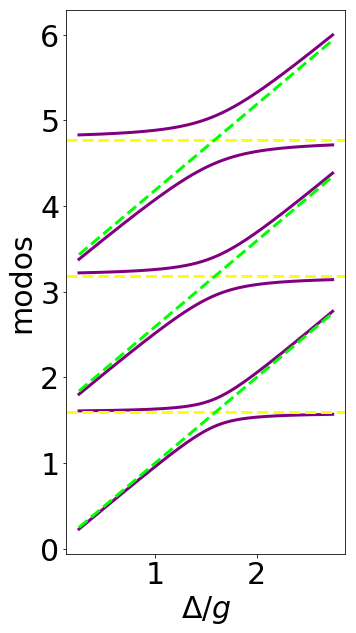

In [50]:
def modos_p(w1list):
    
    idx = 0
    evals_mat = np.zeros((len(w1list),2*N))
    for wa in w1list:

        # Hamiltoniano de JC
        Hsys = wc * nc + wa * na + g * (a.dag() * sm + a * sm.dag())

        # Autovalores del Hamiltoniano
        evals, ekets = Hsys.eigenstates()

        evals_mat[idx,:] = np.real(evals)

        idx += 1

    return evals_mat

wlist = np.linspace(0.25, 2.75, 500) * 2 * pi 

evals_mat = modos_p(wlist)

fig, ax = plt.subplots(figsize=(5,10))
plt.rc('font', size = 30)

for n in [1,2,3,4,5,6]: # Modos polaritonicos
    ax.plot(wlist[:] / (2*pi), (evals_mat[:,n]-evals_mat[:,0]) / (2*pi),lw=3,color='purple')
    
for n in [1,2,3]: # Modos desnudos de la cavidad 
    ax.axhline(y= n * wa/(2*pi) ,lw=3, color='yellow',ls='dashed')

for n in [0,1,2]: # Modos desnudos de la materia
    ax.plot(wlist[:] / (2*pi), n*wa/(2*pi)+wlist[:] / (2*pi),lw=3,color='lime',ls='dashed')
ax.set_xlabel(r'$\Delta/g$')
ax.set_ylabel('modos')

#plt.savefig('diagrama_de_energias.png')

La forma más general de representar matemáticamente un estado cuántico es por medio del operador densidad,  y su dinamica es descrita por medio de la ecuacion maestra de Born - Markov (Vogel & Welsch, 2006):

$$\frac{{d}}{{dt}}\rho = -i \left[H_{sys},\rho\right] + \sum_{O = a,\sigma} \gamma_O  \left( O \rho O^\dagger - \frac{{1}}{{2}}\left\{ O^\dagger O, \rho \right\}\right)$$

La ecuación maestra de cualquier sistema depende de los procesos de interacción con su entorno $\gamma_O$, que pueden ser, bombeo y perdida de fotones, dephasing o perdida de fase, bombeo y perdida de excitones, entre otros. Todos estos procesos definen los modos y estados del sistema y son contrastados experimentalmente a través del espectro de potencias. 

La solución al espectro de potencias mostrada en  (Sanvitto & Timofeev, 2012, p24):

$$S(\omega) =\frac{{1}}{{\pi}} \sum_{p\in N} \frac{{L_p \frac{{\gamma_p}}{{2}}-K_p (\omega-\omega_p)}}{{\left( \frac{{\gamma_p}}{{2}}\right)^2-\left( \omega-\omega_p\right)^2}}$$

introduce varias cantidades, que permiten conocer las propiedades espectrales intrínsecas del modelo JC, esta solución es independiente de las tasas de disipación y/o bombeo de la ecuación maestra, y pasa a depender de unos coeficientes $L_p$ y $K_p$ que contienen dichas tasas.  Esta solución muestra que los estados vestidos emiten lorentzianas y estas posiblemente interfieran entre sí.

Las Lorentzianas están caracterizadas por las frecuencias de resonancia $\omega_p$ y sus respectivos anchos $\gamma_p$, los cuales definen también sus términos de interferencia. Las Lorentzianas y sus términos de interferencia van pesadas por coeficientes $L_p$ y $K_p$ que determinan la intensidad de transición de la resonancia asociada y dependen de los términos de disipación y bombeo incoherentes de la ecuación maestra.

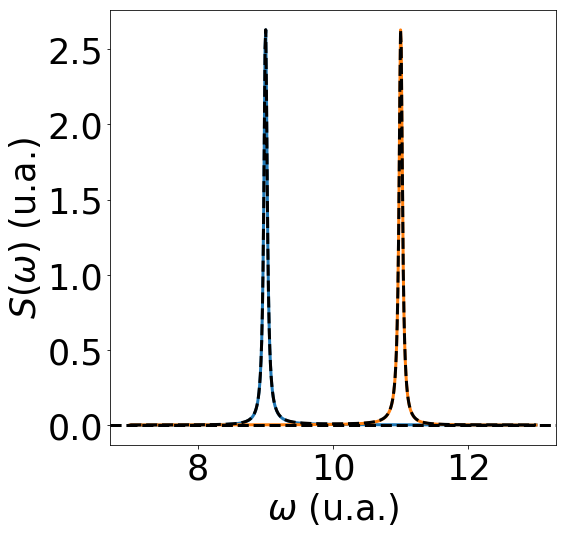

In [57]:
def spectrum_decomposition(w,wp,gam,L,K): #descomposición del espectro
    S = -(1 / (2 * pi)) * (L * gam - K * (w-wp))/(gam**2 + (w-wp)**2)

    return S

gammaa = 0.1  #tasa de disipación de la cavidad
gammas = 0.02  #tasa de disipación de la materia

Hsys = wc * nc + wa * na + g * (a.dag() * sm + a * sm.dag())
c_opsa = [math.sqrt(gammaa)*a] 
c_opss = [math.sqrt(gammas)*sm]


c_opsunion = list([c_opsa,c_opss])
c_ops = [val for sublist in c_opsunion for val in sublist]

L = liouvillian(Hsys, c_ops)

# estado estacionario del sistema
rho0 = steadystate(L)


a_op_ss = expect(a, rho0)
b_op_ss = expect(a.dag(), rho0)
n_ss = expect(a.dag()*a, rho0)

# Solucion en series para (a.dag() * rho0)(t)
es = ode2es(L, a.dag() * rho0)

#correlación
corr_es = expect(a, es)

L = corr_es.ampl.real     #peso Lorentziana 
K = corr_es.ampl.imag     #peso interferencias 
wp = corr_es.rates.imag   #frecuencias resonancia
gam = corr_es.rates.real  #anchos

wlist = np.linspace((wa-3),wa+3, 600)

fig, ax = plt.subplots(1, 1,figsize=(8, 8))

ps = np.zeros((len(L),len(wlist)))
for j in xrange(len(L)):
    ps[j,:] =  [spectrum_decomposition(w,-wp[j],gam[j],L[j],K[j]) for w in wlist] # componentes  
    Ss = [sum(column) for column in zip(*ps)] # espectro
    ax.plot(wlist, ps[j,:],lw=3)    


ax.plot(wlist, Ss,'k',lw=3,ls='dashed')

ax.axhline(y=0, color='k',lw=3,ls='dashed')
ax.set_xlabel(r'$\omega$ (u.a.)')
ax.set_ylabel(r'$S(\omega)$ (u.a.)')
plt.rc('font', size = 35)
#plt.savefig('spectrum_strong.png')